<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Zomato_logo.png/600px-Zomato_logo.png width="300" height="300" style="float:right">

# Zomato Analysis

#### 1. Loading the dataset: Load the data and import the libraries.
#### 2. Data Cleaning:
   - Deleting redundant columns.
   - Renaming the columns.
   - Dropping duplicates.
   - Cleaning individual columns.
   - Remove the NaN values from the dataset
   - #Some Transformations
    
#### 3. Regression Analysis
   - Linear Regression
   - Decision Tree Regression
   - Random Forest Regression

#### 4. Data Visualization: Using plots to find relations between the features.
   - Restaurants delivering Online or not
   - Restaurants allowing table booking or not
   - Table booking Rate vs Rate
   - Best Location
   - Relation between Location and Rating
   - Restaurant Type
   - Gaussian Rest type and Rating
   - Types of Services
   - Relation between Type and Rating
   - Cost of Restuarant
   - No. of restaurants in a Location
   - Restaurant type
   - Most famous restaurant chains in Bengaluru


<img src=https://www.freepnglogos.com/uploads/divider-png/divider-wild-pirate-mutiny-rank-hearthstone-decks-30.png>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
zomato_real = pd.read_csv('zomato.csv')

In [3]:
zomato = zomato_real.copy()

In [6]:
zomato

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [15]:
zomato.shape

(51717, 17)

In [5]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

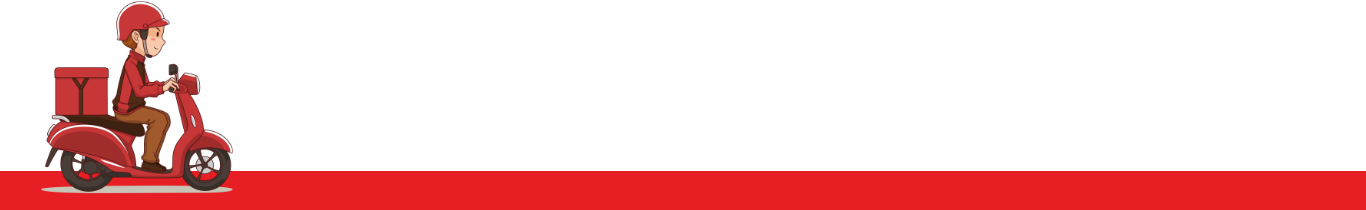

# Data cleaning

##### -  Deleting redundant columns 

like logically we don't need columns like url, address, phone

In [4]:
zomato.drop(columns=['url', 'address','phone', 'dish_liked'], inplace=True)

In [39]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   reviews_list                 51717 non-null  object
 10  menu_item                    51717 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

##### - Renaming columns

In [5]:
zomato.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type',
                       'reviews_list':'reviews', 'menu_item':'menu', 'listed_in(city)':'city', } ,
             inplace=True)

In [48]:
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews', 'menu', 'type', 'city'],
      dtype='object')

##### - Dropping duplicates

In [7]:
print('No. of rows that contain duplicate data = ', zomato.duplicated().sum())

No. of rows that contain duplicate data =  63


In [6]:
zomato.drop_duplicates(inplace=True)

##### - Cleaning individual Columns 

##### - Remove the NaN values from Dataset 

In [9]:
print('No. of null values\n\n', zomato.isna().sum())

No. of null values

 name               0
online_order       0
book_table         0
rate            7760
votes              0
location          21
rest_type        227
cuisines          45
cost             345
reviews            0
menu               0
type               0
city               0
dtype: int64


In [7]:
zomato.dropna(axis='index', inplace=True)

In [8]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43486 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          43486 non-null  object
 1   online_order  43486 non-null  object
 2   book_table    43486 non-null  object
 3   rate          43486 non-null  object
 4   votes         43486 non-null  int64 
 5   location      43486 non-null  object
 6   rest_type     43486 non-null  object
 7   cuisines      43486 non-null  object
 8   cost          43486 non-null  object
 9   reviews       43486 non-null  object
 10  menu          43486 non-null  object
 11  type          43486 non-null  object
 12  city          43486 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.6+ MB


##### 

## Visualizations

##### Restraunts delivering online or not

<AxesSubplot:xlabel='count', ylabel='online_order'>

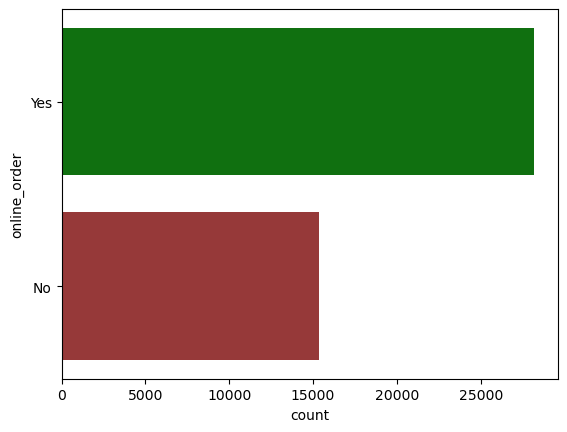

In [27]:
sns.countplot(y='online_order', data=zomato, palette=['green','brown'])

In [20]:
zomato[zomato['online_order'] == "No"].shape[0]          #no of restraunts not delivering online

15321

In [21]:
zomato[zomato['online_order'] == "Yes"].shape[0]          #no of restraunts delivering online

28165

There are more than 15k restraunts that are still not delivering online. This means they as well as zomato is loosing business. And we need to onboard them on zomato too.
### 

<AxesSubplot:xlabel='count', ylabel='book_table'>

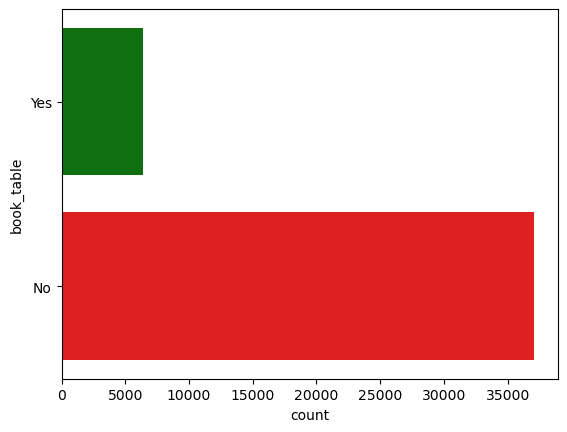

In [28]:
sns.countplot(y='book_table', data=zomato, palette=['green','red'])

In [29]:
zomato[zomato['book_table'] == "No"].shape[0]          #no of restraunts not allowing table booking.

37063

In [30]:
zomato[zomato['book_table'] == "Yes"].shape[0]          #no of restraunts allowing table booking.

6423

There are about 37k restraunts that are still not allowing table booking. While some of them might not have sitting avalability, but those who have can be onboarded on zomato.
### 

#### Table booking rate v/s rate

#### Best Location

Text(0.5, 1.0, 'Location wise count of restraunts')

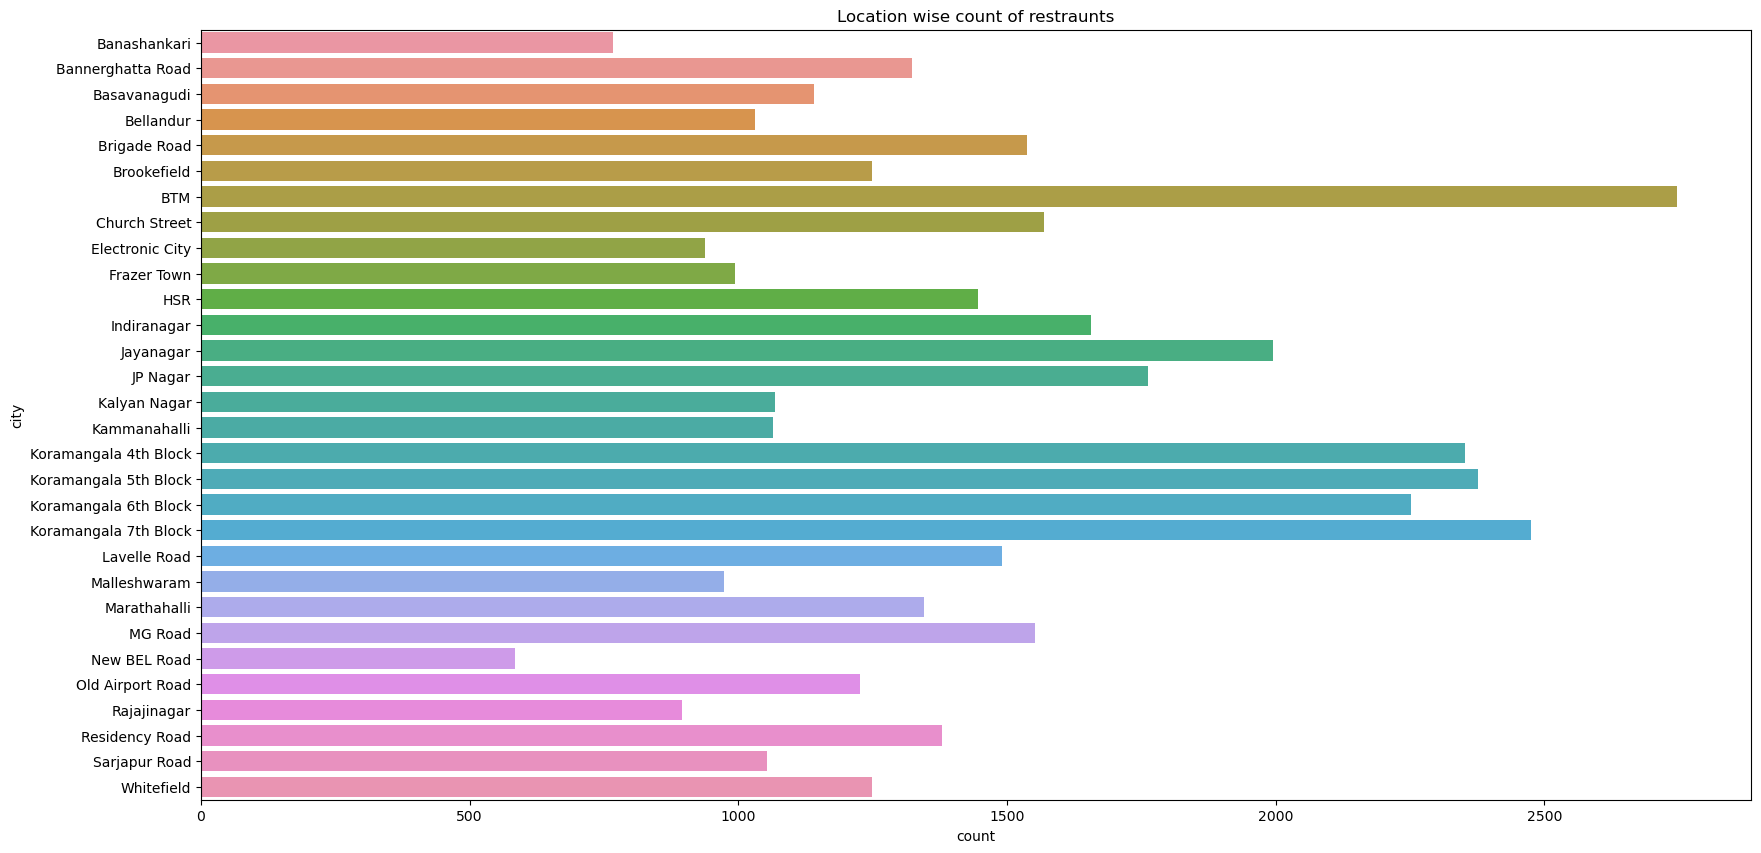

In [20]:
sns.countplot(y=zomato['city'])
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Location wise count of restraunts')

If we judge by the maximum number of the restraunts, the BTM is the best location

#### Relation between Location and Rating

#### Restaurant type

In [26]:
zomato['rest_type'].value_counts()

Quick Bites                   14987
Casual Dining                  9868
Cafe                           3490
Dessert Parlor                 1925
Delivery                       1775
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

Text(0.5, 1.0, 'count restraunts according to their type')

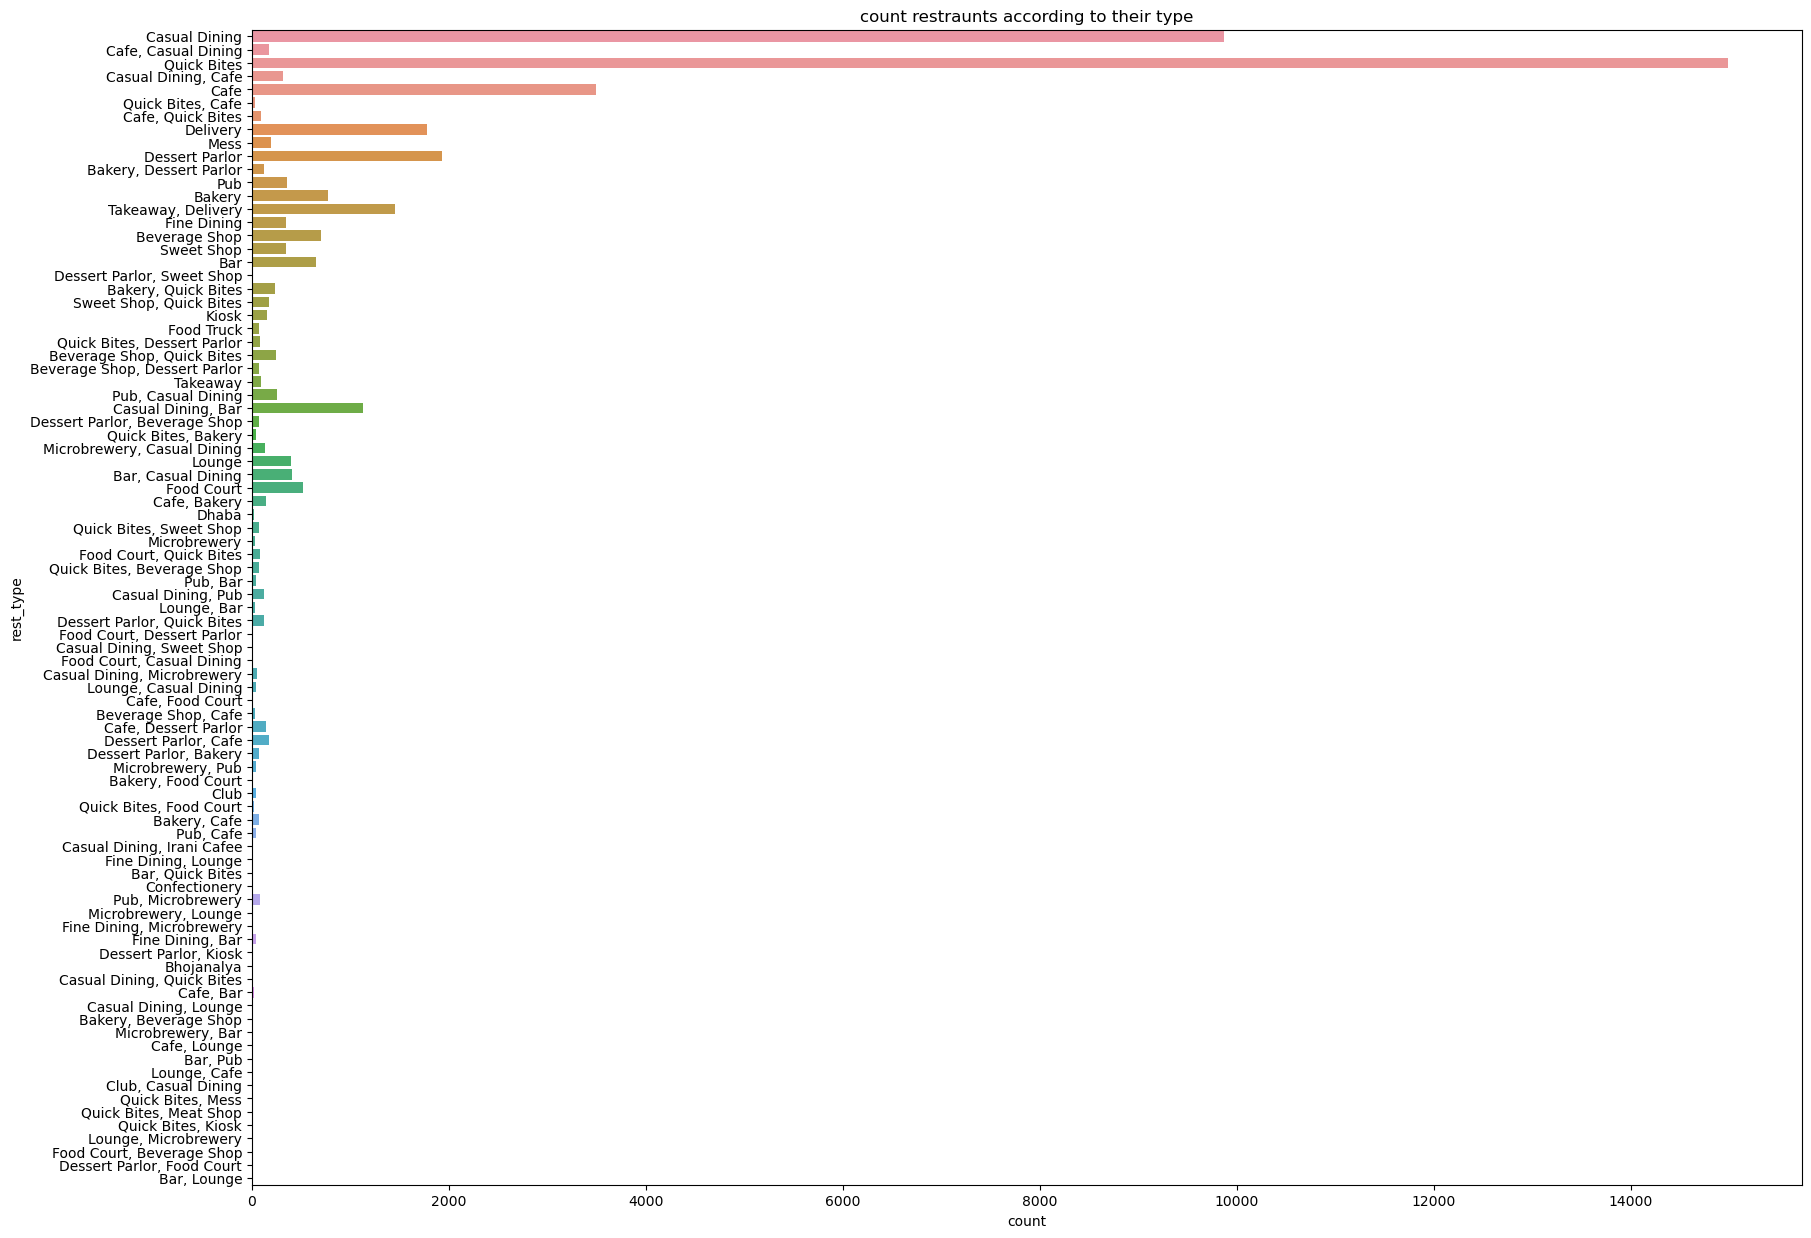

In [33]:
sns.countplot(y=zomato['rest_type'])
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.title('count restraunts according to their type')

As we can see that most of the restraunts are quickbite category

## 
#### Guassian Rest Type and Rating

## 
#### Types of services

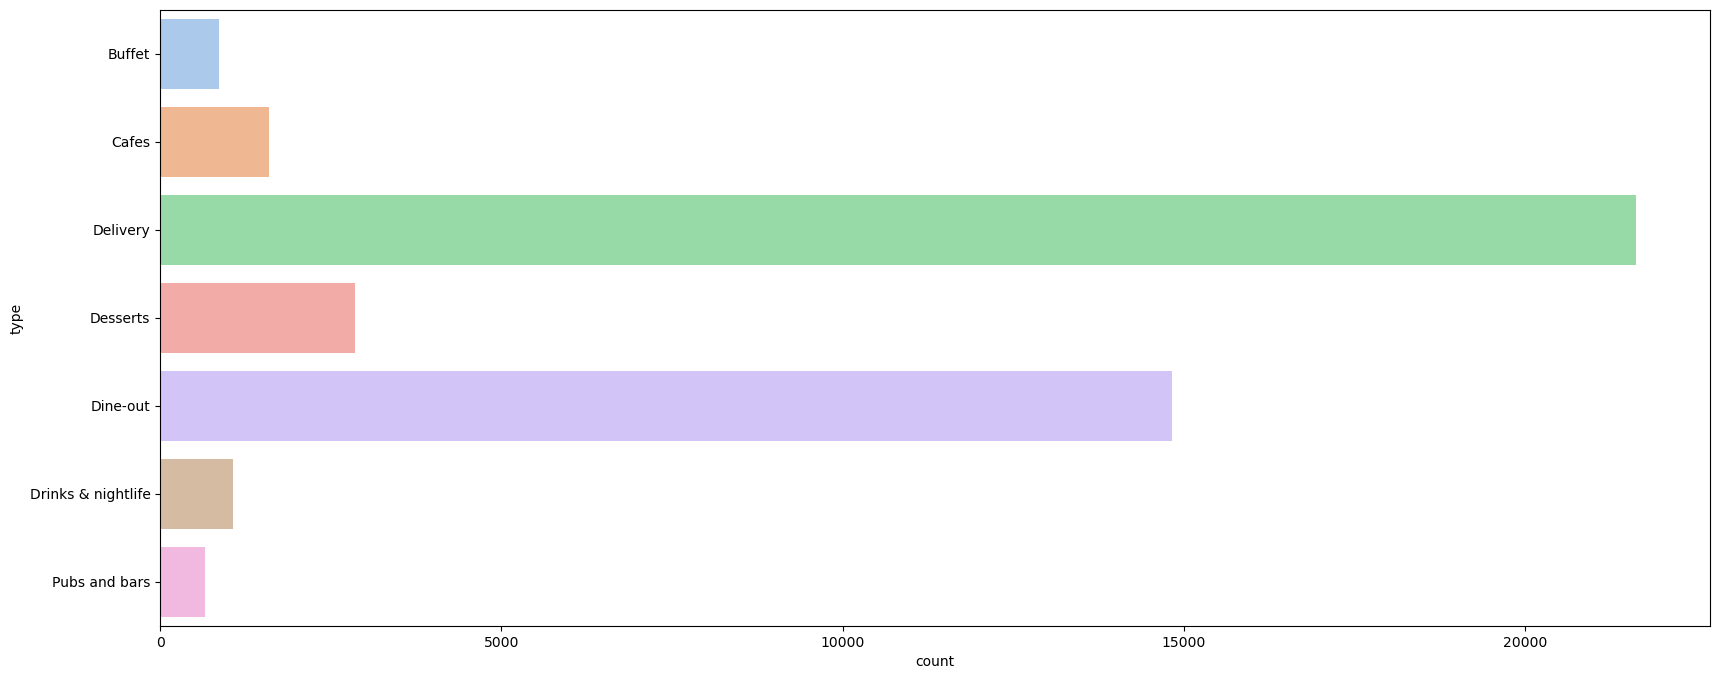

In [118]:
sns.countplot(data=zomato, y="type", palette="pastel")
fig = plt.gcf()
fig.set_size_inches(20,8)

## 
#### Relation between type and Rating

## 
#### Cost of restraunt

In [82]:
zomato['cost'] = zomato['cost'].apply(lambda x: float(x.replace(',','')))

Text(0.5, 1.0, 'count of restraunts according to cost')

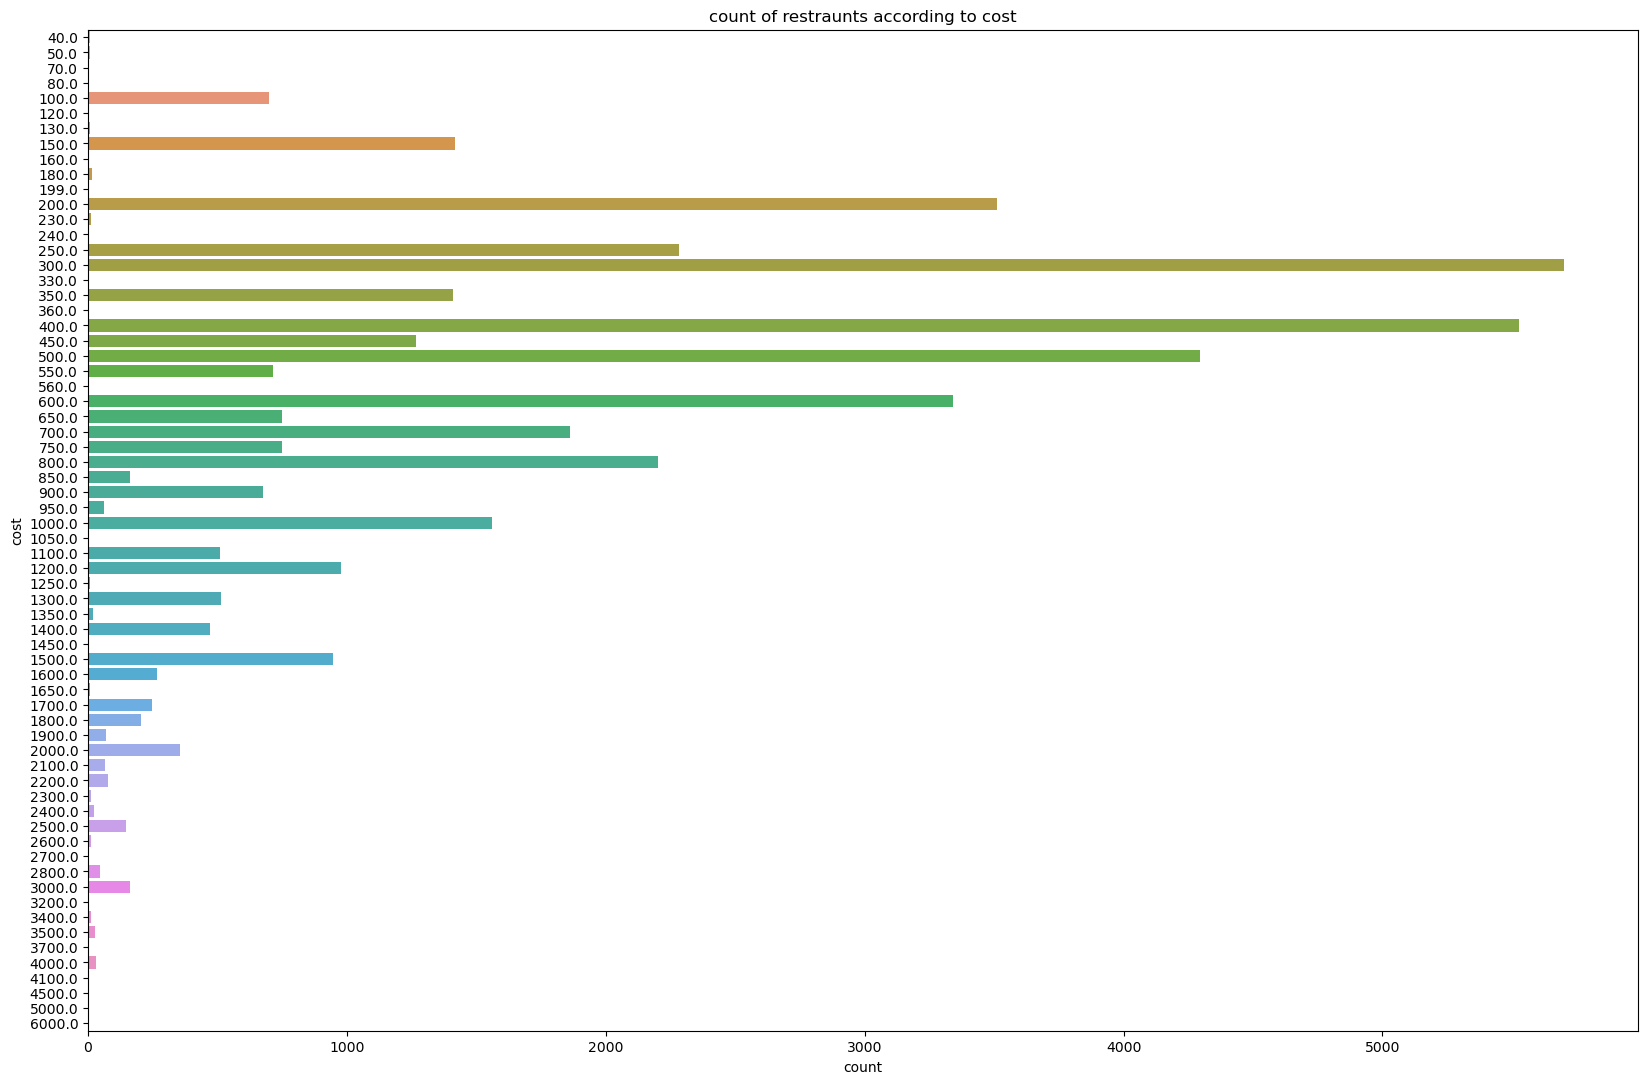

In [104]:
sns.countplot(data=zomato, y='cost')
fig = plt.gcf()
fig.set_size_inches(20,13)
plt.title('count of restraunts according to cost')

Based on the visulization above we can say that maximum number of restraunts have an average cost between 200 - 600

#### pallete names

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

## 
#### No of restraunt in a location

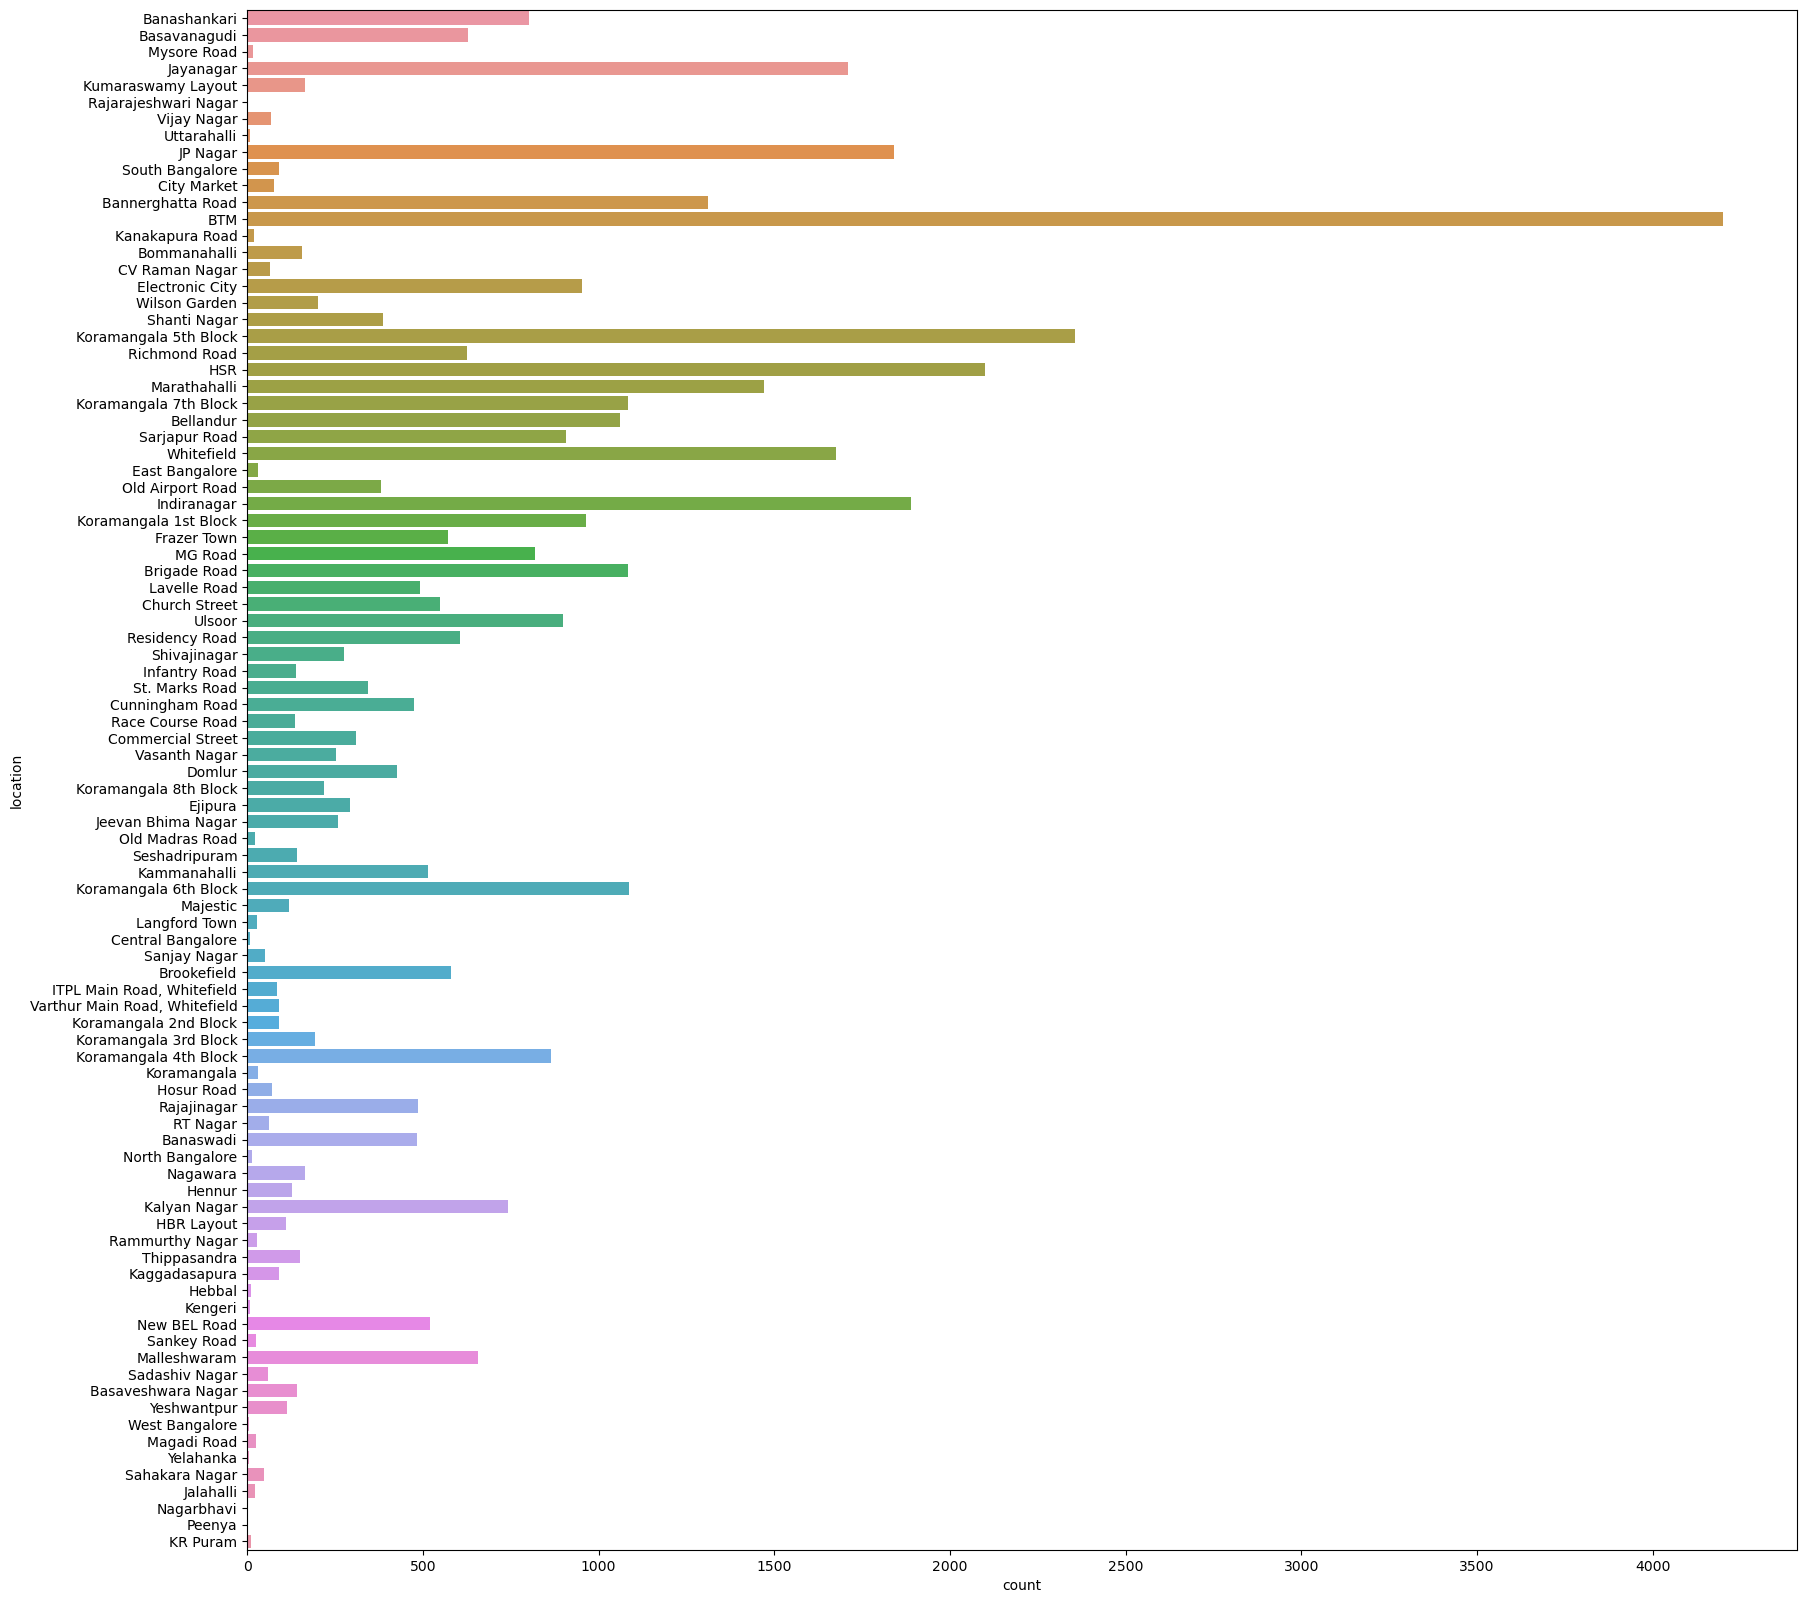

In [117]:
sns.countplot(data=zomato, y="location")
fig = plt.gcf()
fig.set_size_inches(20,20)

## 
#### Most Famous restraunt chains in Bangaluru

In [148]:
chains.index

Index(['Cafe Coffee Day', 'Onesta', 'Just Bake', 'Empire Restaurant',
       'Five Star Chicken', 'Kanti Sweets', 'Petoo', 'Polar Bear',
       'Baskin Robbins', 'Chef Baker's', 'Pizza Hut', 'Domino's Pizza', 'KFC',
       'Sweet Truth', 'Subway', 'Beijing Bites', 'Smoor', 'McDonald's',
       'Chai Point', 'Faasos'],
      dtype='object')

<AxesSubplot:>

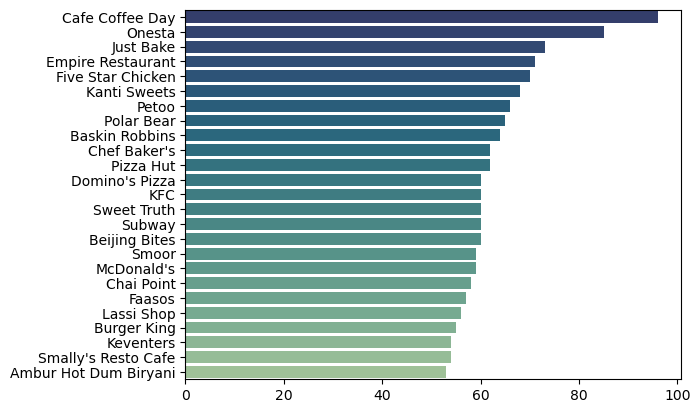

In [163]:
chains=zomato_real['name'].value_counts()[:25]
sns.barplot(x=chains.values, y=chains.index, palette="crest_r")

Based on above visualizatio, we can see that top 10 popular restraunt chains are :-
- Cafe coffe Day
- Onesta
- Just bake
- Empire Restaurant
- Five Star Chicken
- Kanti Sweets
- Petoo
- Polar Bear
- Baskin Robbins
- Chef Baker's

##### who has the maximum number of reviews

In [9]:
m = [len(zomato.iloc[i]['reviews_list']) for i in range(zomato.shape[0])]
zomato.iloc[m.index(max(m))]

url                            https://www.zomato.com/bangalore/strikers-spor...
address                        90, K H Road, Double Road, Office, Opposite KS...
name                                               Strikers Sports Bar and Music
online_order                                                                  No
book_table                                                                   Yes
rate                                                                      3.8 /5
votes                                                                         73
phone                                             +91 9742364993\n+91 9741375529
location                                                            Shanti Nagar
rest_type                                                                    Bar
dish_liked                                                                  Beer
cuisines                                      Continental, North Indian, Chinese
approx_cost(for two people) 

Strikers Sports Bar and Music has the maximum number of reviews

In [7]:
148*1/3


49.333333333333336

In [4]:
211/133

1.586466165413534